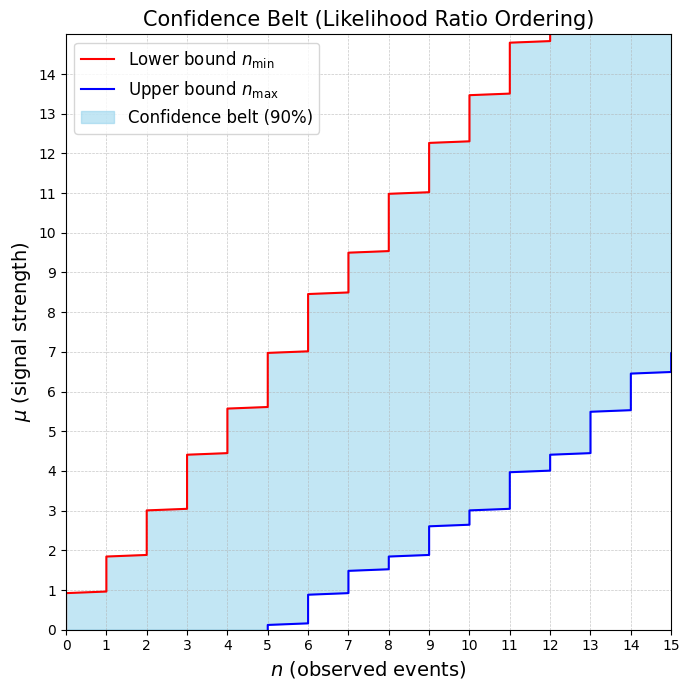

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# --- Helper function ---
def poisson_distribution(mu, b, n):
    return poisson.pmf(n, mu + b)

# --- Likelihood ratio-based acceptance region ---
def get_range(mu, b=3.0, max_n=40, CL=0.9):
    P_1_list = np.array([poisson_distribution(mu, b, n) for n in range(max_n)])
    P_2_list = np.array([
        poisson_distribution(max(0, n - b), b, n) for n in range(max_n)
    ])

    Profile_likelihood_ratio = P_1_list / P_2_list
    sorted_indices = np.argsort(-Profile_likelihood_ratio)
    sorted_probs = P_1_list[sorted_indices]
    cumulative_sum = np.cumsum(sorted_probs)
    # last_index = np.argmin(np.abs(cumulative_sum - CL))
    last_index = np.argmax(cumulative_sum >= CL)
    accepted_n = sorted_indices[:last_index + 1]
    n_min = np.min(accepted_n)
    n_max = np.max(accepted_n)
    return n_min, n_max

# --- Build the belt ---
mu_vals = np.linspace(0, 20, 500)
n_min_list = []
n_max_list = []

for mu in mu_vals:
    n_min, n_max = get_range(mu)
    n_min_list.append(n_min)
    n_max_list.append(n_max)

# --- Plot with detailed grid and labels ---
plt.figure(figsize=(7, 7))
plt.plot(n_min_list, mu_vals, label=r'Lower bound $n_{\mathrm{min}}$', color='red')
plt.plot(n_max_list, mu_vals, label=r'Upper bound $n_{\mathrm{max}}$', color='blue')
plt.fill_betweenx(mu_vals, n_min_list, n_max_list, color='skyblue', alpha=0.5, label='Confidence belt (90%)')

# Axis labels
plt.xlabel(r'$n$ (observed events)', fontsize=14)
plt.ylabel(r'$\mu$ (signal strength)', fontsize=14)
plt.title('Confidence Belt (Likelihood Ratio Ordering)', fontsize=15)

# Custom ticks for integer n and readable mu
plt.xticks(np.arange(0, max(n_max_list) + 2, 1))  # Integers for n
plt.yticks(np.arange(0, 15, 1))  # Every 0.5 for mu
plt.xlim(0, 15)
plt.ylim(0, 15)
# Grid and layout
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()
